# Frequency analysis of the duplicated access requests.
In this notebook, we analize the duplicated access requests in the access log.
This property appear only in the synthetic access log. In the AMZ case study
we don't find this property.

In [2]:
### Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

In [13]:
### Load data
#filepath = "../data/no-uniform/UN-Pareto-AMZ-universal.csv"
filepath = "../data/no-uniform/HC-expo-universal.csv"
#filepath = "../data/HC-universal.csv"
#filepath = "../data/HC-poisson-universal.csv"
#filepath = "../../SecondYear/01-Datasets/IoT-amz-universal.csv"
acc_log = pd.read_csv(filepath)
acc_log = acc_log[acc_log.columns[1:]]
print("Access Log Loaded!")
print(acc_log.info())

Access Log Loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153731 entries, 0 to 153730
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uname        153731 non-null  object
 1   position     153731 non-null  object
 2   uward        153731 non-null  object
 3   specialties  153731 non-null  object
 4   teams        153731 non-null  object
 5   agentfor     153731 non-null  object
 6   type         153731 non-null  object
 7   author       153731 non-null  object
 8   patient      153731 non-null  object
 9   topics       153731 non-null  object
 10  tratingTeam  153731 non-null  object
 11  rward        153731 non-null  object
 12  rname        153731 non-null  int64 
 13  ACTION       153731 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 16.4+ MB
None


In [14]:
### Number of duplicated access requests
print("# Access requests = ", len(acc_log))
print("# Unique Access requests = ", len(acc_log.drop_duplicates()), 
      "({:.2f}%)".format((len(acc_log.drop_duplicates())*100)/len(acc_log)))
difference_acc_req = len(acc_log) - len(acc_log.drop_duplicates())
print("Difference = ", difference_acc_req)

# Access requests =  153731


# Unique Access requests =  58604 (38.12%)
Difference =  95127


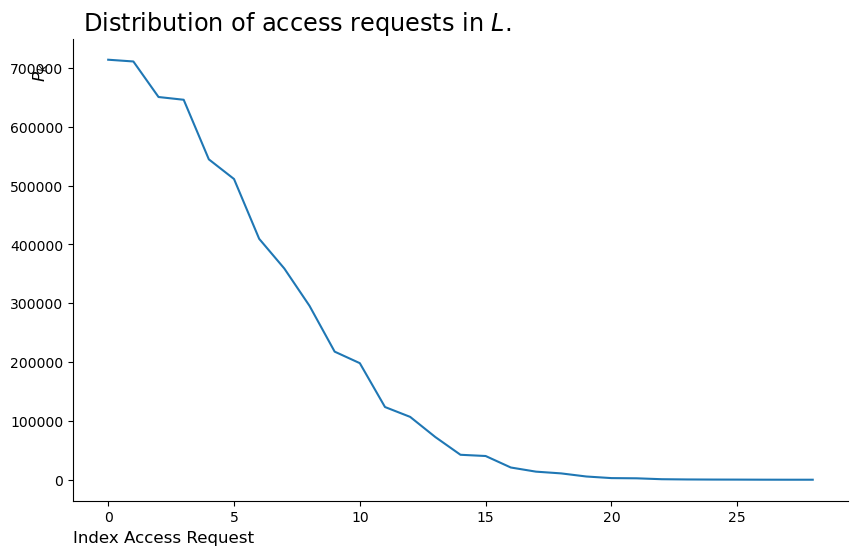

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
to_plot = acc_log.rname.value_counts()
ax.plot(range(len(to_plot)), to_plot)
ax.set_xlabel('Index Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large", x=0.29, y=1, parse_math=True)
plt.show()

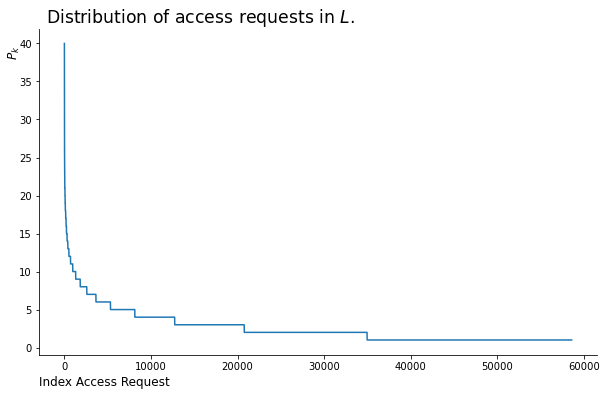

In [15]:
### Selection only user-resource access requests

#fpath = Path(mpl.get_data_path(), "C:\\Users\\danie\\AppData\\Local\\Microsoft\\Windows\\Fonts\\mulish-regular.ttf")


fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
#to_plot = acc_log.value_counts(["uname", "rname", "op", "location", "timeday"], normalize=False)
to_plot = acc_log.value_counts(["uname", "rname"], normalize=False)
ax.plot(range(len(to_plot)), to_plot)
ax.set_xlabel('Index Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large", x=0.29, y=1, parse_math=True)
plt.show()

In [28]:
new_plot = np.log2(to_plot.values) + 1
new_plot

array([11.81458247, 11.79116289, 11.77971936, ...,  1.        ,
        1.        ,  1.        ])

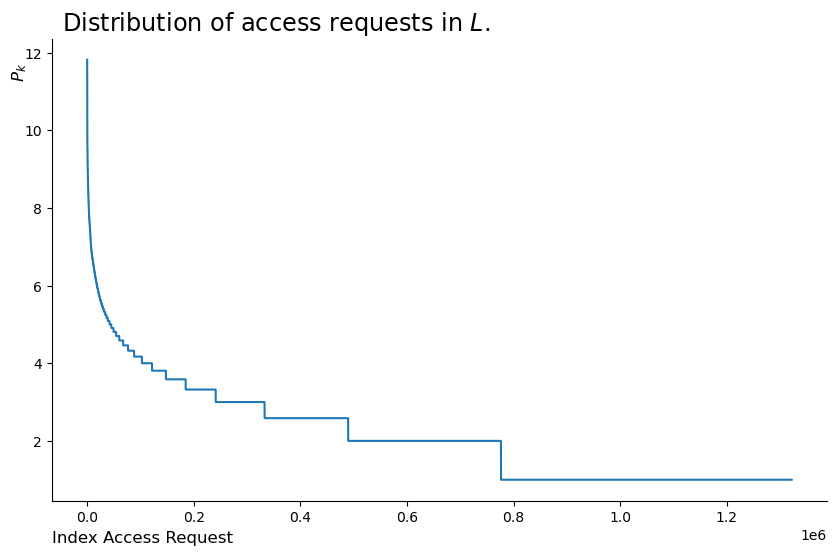

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(len(new_plot)), new_plot)
ax.set_xlabel('Index Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large", x=0.29, y=1, parse_math=True)
plt.show()

In [13]:
del acc_log, to_plot

In [5]:
# from collections import Counter
to_plot2 = Counter(list(to_plot.values))
to_plot2 = dict(to_plot2)
to_plot2

NameError: name 'Counter' is not defined

(array([123.,  28.,   5.,   6.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <BarContainer object of 10 artists>)

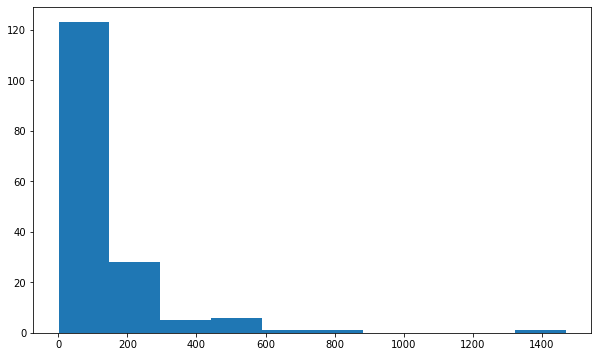

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(to_plot2)

([<matplotlib.patches.Wedge at 0x27b401b2148>,
 [Text(1.099999999391374, 3.659203734134094e-05, '11'),
  Text(1.0999999507012983, 0.0003293283186410189, '9'),
  Text(1.0999985977260371, 0.001756417021207093, '8'),
  Text(1.0999598011065734, 0.009404039003928716, '7'),
  Text(1.0993656042926456, 0.03735328765003709, '6'),
  Text(1.0921128842480075, 0.13148934580223082, '5'),
  Text(1.0247991974502633, 0.3997331671318963, '4'),
  Text(0.5828077596487207, 0.9329175286665158, '3'),
  Text(-0.7978362369704319, 0.7572696606737003, '2'),
  Text(0.08561190497115823, -1.0966633949062081, '1')],
 [Text(0.5999999996680221, 1.9959293095276873e-05, '0.0%'),
  Text(0.599999973109799, 0.00017963362834964665, '0.0%'),
  Text(0.5999992351232929, 0.0009580456479311416, '0.0%'),
  Text(0.5999780733308582, 0.005129475820324753, '0.2%'),
  Text(0.5996539659778066, 0.020374520536383865, '0.6%'),
  Text(0.5956979368625495, 0.07172146134667134, '2.1%'),
  Text(0.5589813804274163, 0.21803627298103434, '5.9%'),

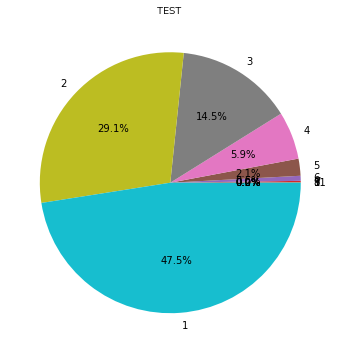

In [57]:
# AX-1
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("TEST ")
labels_ = list(to_plot2.keys())
data_ = list(to_plot2.values())
ax.pie(data_, labels=labels_, autopct='%1.1f%%')